<a href="https://colab.research.google.com/github/rafrys/ml1-project1/blob/master/ML1_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


### **Machine Learning I - final assignment | Project 1 - small dataset**
<br/>

Classify League of Legends ranked games outcome by looking at the statistics from the first 10 min of game. 

Authors: 
Filip Nowakowski,
Rafał Rysiejko

League of Legends (LoL) is a multiplayer online battle arena video game developed and published by Riot Games for Microsoft Windows and macOS. In League of Legends, players assume the role of a "champion" with unique abilities and battle against a team of other players- or computer-controlled champions. The goal is usually to destroy the opposing team's "Nexus", a structure that lies at the heart of a base protected by defensive structures. In its most popular game mode, players form two teams of five members with each player assigned to a different role (e.g., jungler, support)
By 2013, League of Legends has been the most-played multiplayer PC game in the world [1] 

League of Legends has an active and widespread competitive scene and is the world's most-watched eSport, with total and peak viewerships that not only outdistance direct competitors such as Dota 2 and Fortnite, but other traditional sports events such as the Super Bowl [2]. LoL is also commonly described as a significant factor in the industry's legitimization.


Following this massive success and an ever-increasing player-base, it is worth taking a look at the underlying factors that might influence the chances of winning a game. Analyzing this might be useful for individual players by giving them insights on what actions/strategies might help them win.  Those insights might also be leveraged by the game developers to pinpoint certain win-determining factors and then judge if they should be altered/changed to create a more balanced and fun game.


---
[1]: GameCentral (August 4, 2017). ["League Of Legends is still the biggest video game in the world"](https://metro.co.uk/2017/08/04/league-of-legends-is-still-the-biggest-video-game-in-the-world-6828565/). Metro. Archived June 26, 2018. Retrieved June 01, 2020. <br>

[2]: ["This esports giant draws in more viewers than the Super Bowl, and it's expected to get even bigger"](https://www.cnbc.com/2019/04/14/league-of-legends-gets-more-viewers-than-super-bowlwhats-coming-next.html). CNBC. April 14, 2019. Retrieved June 01, 2020


## Initializing packages, mounting colab, loading data.

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
# Reading data, saving it as a pandas dataframe
url = 'https://raw.githubusercontent.com/rafrys/ml1-project1/master/high_diamond_ranked_10min.csv?token=ANJZF2QUDIWP6BORIWPJUIC64SUQ2'
df_all = pd.read_csv(url)

## Explanatory Data Analysis

#### Dataset description

The dataset used for our analysis comprises statistics from approximately 10 000 games. Those games were played on a standard ranked (solo queue) game mode on a high ELO (score similar to chess ELO) level (Diamond I to Masters). This combination of high-level players and a ranked game mode guarantees that gathered statistics reflect an actual state of the game and represent its underlying mechanics and strategies. There are 19 distinct features per team (38 in total for team Blue and team Red).  Those statistics were collected after 10 minutes of gameplay and include information about kills, deaths, gold, experience, etc. The primary variable of interest is a binary variable blueWins; it indicates if a Blue team had won a game with 1 (and 0 if a Red team had won a game).

In [ ]:
df_all.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
#Checking dataset structure
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
# Overview of the dataset
df_all.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [ ]:
df_preproc = df_all.copy()

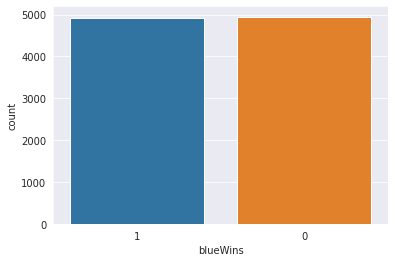

In [ ]:
## Distribution of games won per team

sns.countplot(df_all['blueWins'],order=[1,0]) 

plt.show()


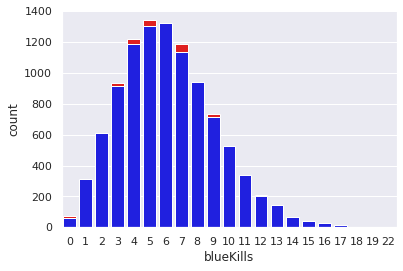

In [ ]:
## Distribution of kills and deaths (totals)

sns.countplot(df_all['redKills'],color = "red") 
sns.countplot(df_all['blueKills'],color = 'blue') 


plt.show()

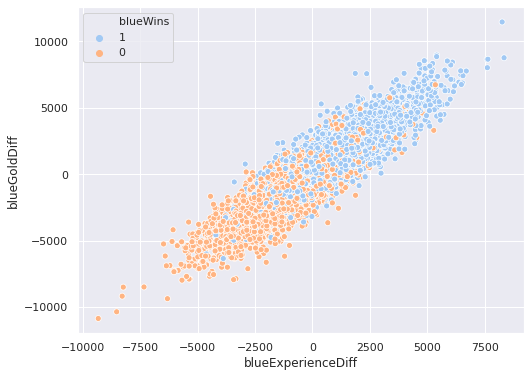

In [ ]:
## Importance of exp and gold (wards placed per team | if won | if lost)
plt.figure(figsize=(8,6))
sns.scatterplot(x='blueExperienceDiff', y='blueGoldDiff', hue='blueWins',hue_order=[1,0], data=df_all)

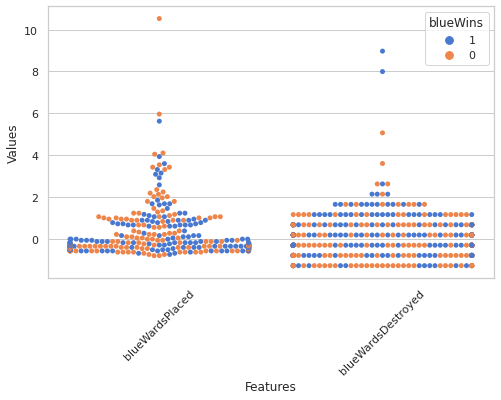

In [ ]:
## Importance of warding (wards placed per team | if won | if lost)
sns.set(style='whitegrid', palette='muted')

data = df_all[['blueWardsPlaced','blueWardsDestroyed']].sample(500)
data_std = (data - data.mean()) / data.std()
data = pd.concat([df_all.blueWins, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(8,5))
sns.swarmplot(x='Features', y='Values', hue='blueWins',hue_order=[1,0], data=data)
plt.xticks(rotation=45)
plt.show()

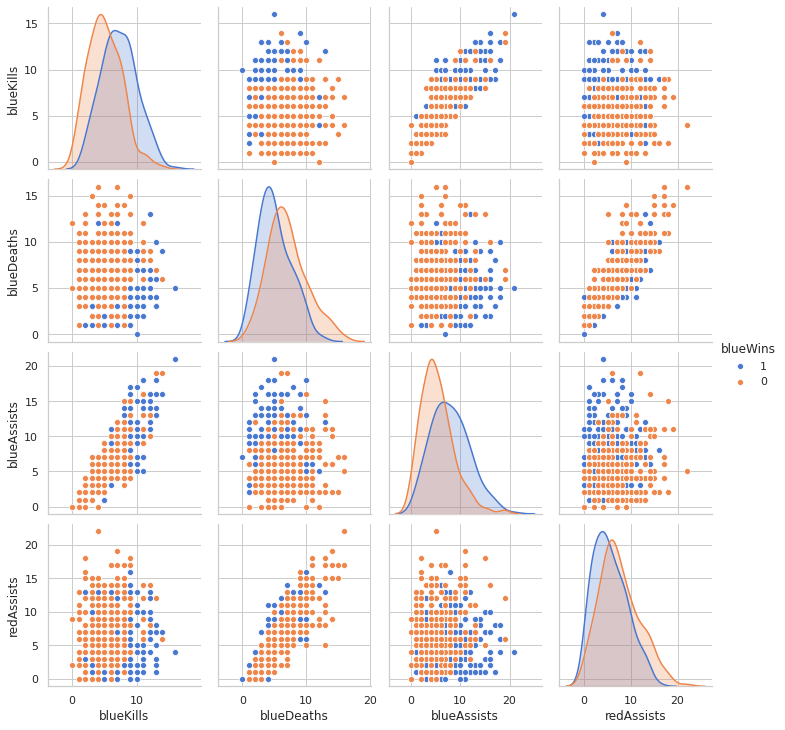

In [ ]:
## Importance of player kills (wards placed per team | if won | if lost)
data = df_all.sample(500)

sns.pairplot(data, vars=['blueKills','blueDeaths','blueAssists','redAssists'], 
             hue='blueWins',hue_order=[1,0])

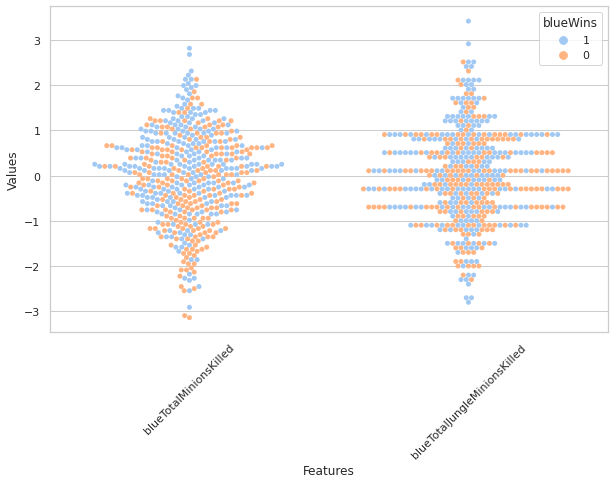

In [ ]:
## Importance of monster kills  (wards placed per team | if won | if lost)

sns.set(style='whitegrid', palette='pastel')

data = df_all[['blueTotalMinionsKilled','blueTotalJungleMinionsKilled']].sample(500)
data_std = (data - data.mean()) / data.std()
data = pd.concat([df_all.blueWins, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10,6))
sns.swarmplot(x='Features', y='Values', hue='blueWins',hue_order=[1,0], data=data)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#sns.pairplot(df_preproc)

### Preprocessing for modelling

In [ ]:
# Delimiting subset by variables of no use (the one that are doubling eg, blueDeath/redKills)
# As the Blue and Red team are facing each other in a game, in each record there would be a negative correlation among features related to Blue team and features releted to Red team.
# Hence performing an analysis of factors that influence variable blueWin can be performed using:
# 1. Only features of team Blue 
# 2. Only features of team Red
# The authors choose to move proceed forward using only features of team Blue. 

cols_delete = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled','redAvgLevel','blueAvgLevel']

df_preproc = df_preproc.drop(cols_delete,axis=1)

df_preproc.head()

                              gameId  ...  redGoldPerMin
gameId                          True  ...          False
blueWardsPlaced                False  ...          False
blueWardsDestroyed             False  ...          False
blueFirstBlood                 False  ...          False
blueKills                      False  ...          False
blueDeaths                     False  ...           True
blueAssists                    False  ...          False
blueEliteMonsters              False  ...          False
blueDragons                    False  ...          False
blueHeralds                    False  ...          False
blueTowersDestroyed            False  ...          False
blueTotalGold                  False  ...          False
blueAvgLevel                   False  ...          False
blueTotalExperience            False  ...          False
blueTotalMinionsKilled         False  ...          False
blueTotalJungleMinionsKilled   False  ...          False
blueGoldDiff                   

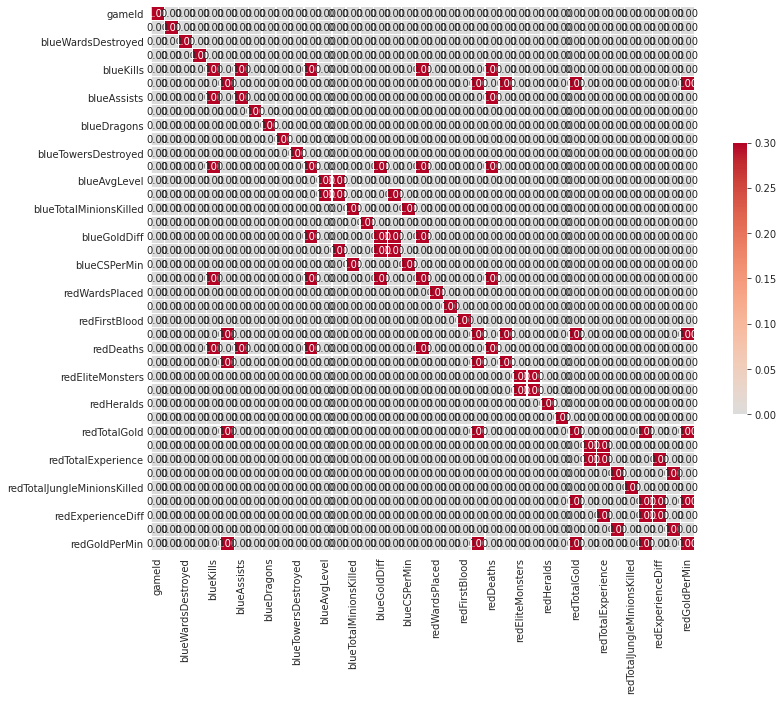

In [ ]:
corr = df_preproc.drop('blueWins', axis=1).corr()
g = sns.heatmap(corr > 0.8,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm',)
sns.despine()
print(corr>0.8)
g.figure.set_size_inches(14,10)
    
plt.show()

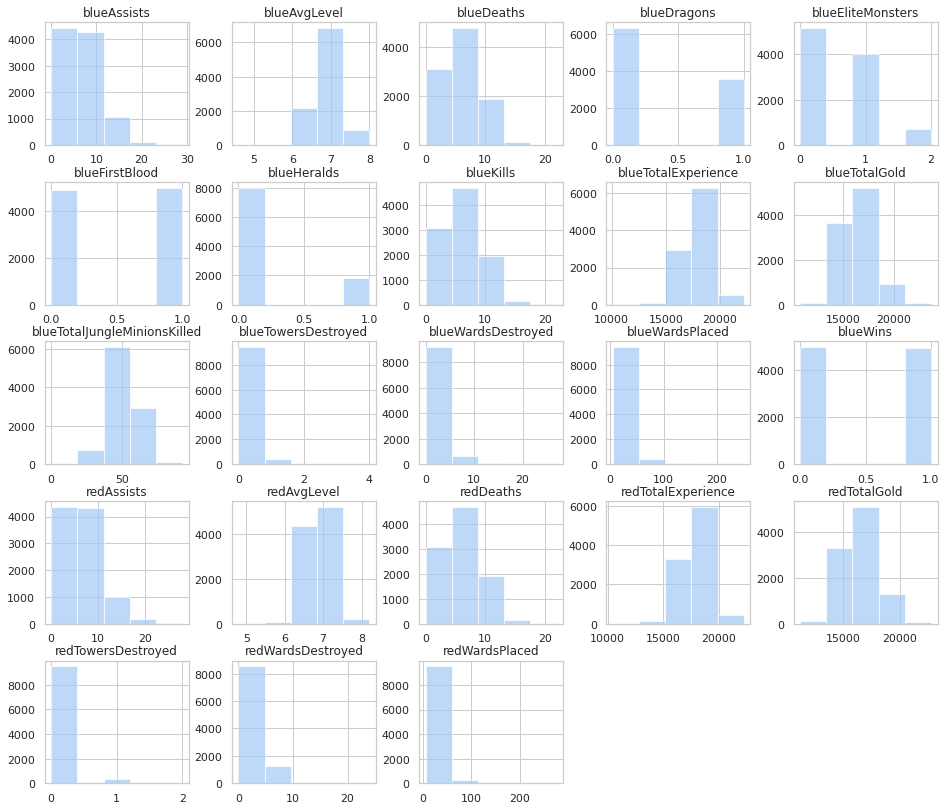

In [ ]:
# Histogram of variables selected for modeling
df_preproc.hist(alpha = 0.7, figsize=(16,14), bins=5);

In [ ]:
## Dividing dataset into test,train
y = df_all['blueWins']
x = df_all.drop(['blueWins'],axis = 1)
df_names = list(df_preproc.columns)


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=43)    

### Modelling

In [ ]:
#Gathering results
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score']


def get_confusion_matrix(algorithm, y_pred, y_actual):
    # Create confusion matrix and interpret values
    con = confusion_matrix(y_test, y_pred)
    tp, fn, fp, tn = con[0][0], con[0][1], con[1][0], con[1][1]
    algorithm = algorithm
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f_score = (2 * precision * recall) / (recall + precision)
    return algorithm, accuracy, recall, precision, f_score

In [ ]:
## Logistic regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('lr', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])


In [ ]:
## Logistic regression diagnostics
print(lr.coef_)


print(lr.score(X_train,y_train))
print('score Logistic Regression :',lr.score(X_test,y_test))

[[-1.20545969e-12  3.94573058e-17  6.05638139e-17  5.65796403e-17
   5.35056561e-16 -5.30037333e-16  6.03560648e-16  7.32053401e-17
   5.19750879e-17  2.12302522e-17  1.52405421e-17  3.43040427e-13
   5.81171618e-17  2.55731601e-13  2.54975928e-15  7.52859011e-16
   6.73453231e-13  5.07568780e-13  2.54975928e-16  3.43040427e-14
  -2.50441805e-16 -6.37775137e-17 -5.65923644e-17 -5.30037333e-16
   5.35056561e-16 -5.78859695e-16 -7.51478265e-17 -5.43503361e-17
  -2.07974904e-17 -1.33917914e-17 -3.30412803e-13 -5.78075725e-17
  -2.51837178e-13 -2.58803003e-15 -5.98155231e-16 -6.73453231e-13
  -5.07568780e-13 -2.58803003e-16 -3.30412803e-14]]
0.5013599274705349
score Logistic Regression : 0.5001533272002453


In [ ]:
## Logistic regression tunning

lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('lrTUNED', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])


In [ ]:
## kNN

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# Test different values of k
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = kneigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

# Use most accurate k value to predict test values
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('KNN', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

print('kNN score:',neigh.score(X_test,y_test))



kNN score: 0.5096596136154554


In [ ]:
## Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

## Decision trees diagnostics 
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Naive Bayes', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

print(gnb.score(X_test, y_test))

0.7273842379638148


In [ ]:
## Decision trees

decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
decTree.fit(X_train,y_train)
y_pred = decTree.predict(X_test)

print(decTree.score(X_test,y_test))

0.7022385771235817


In [ ]:
## Decision trees diagnostics 
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('Decision', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [ ]:
## Random forest

rndf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = rndf.fit(X_train, y_train).predict(X_test)

In [ ]:
## Random forrest diagnostics 
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('R Forest', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])

In [ ]:
##  SVM  

svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.fit(X_train, y_train).predict(X_test)

# Call confusion matrix and accuracy
algorithm, accuracy, recall, precision, f_score = get_confusion_matrix('SVM', y_pred, y_test)

# Add values to table
table.add_row([algorithm, round(accuracy,5), round(recall,5),
               round(precision,5), round(f_score,5)])


print('SVM SCORE: ',svm.score(X_test,y_test))

SVM SCORE:  0.5001533272002453


### Comparison of methods used

In [ ]:
print(table)


+-------------+----------+---------+-----------+---------+
|  Algorithm  | Accuracy |  Recall | Precision | F-Score |
+-------------+----------+---------+-----------+---------+
|      lr     | 0.50015  |   1.0   |  0.50015  |  0.6668 |
|   lrTUNED   | 0.73137  | 0.73881 |   0.7281  | 0.73341 |
|     KNN     | 0.50966  | 0.49234 |  0.51017  | 0.50109 |
| Naive Bayes | 0.72738  | 0.72839 |  0.72705  | 0.72772 |
|   Decision  | 0.70224  | 0.69589 |  0.70497  |  0.7004 |
|   R Forest  | 0.73014  | 0.75904 |  0.71768  | 0.73778 |
|     SVM     | 0.50015  |   1.0   |  0.50015  |  0.6668 |
+-------------+----------+---------+-----------+---------+


### Summary and conclusions

In [ ]:
## Summary of conclusions from the analysis

By running an analysis on League of Legends ranked games outcome, we determined that main factors that might influence winning a game are: Experience,Gold,Kills and Assists

For this particular dataset using a [Random Forest] proved to yield best results. Althought to make sure that our model does not overfit, running model on newly generated data is advised.

In terms of this kind of data, controlling for [games that havent finished due to factors outside of controlled scope] is important to obtain accurate results. 

In [ ]:
## Potential for further extension of analysis.

There is still a great potential for extending the scope of this analysis by including both more information in terms of sample size, number of variables and methods used. 
Including infomation on champions played in game would yield information about currently strong champions (so-called meta) as well as uncover synergies between champions. Operating on larger set of observations would help to test, train and validate model more accurately and make it easier to control for model over and underfitting.